In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten

In [ ]:
(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[0].shape

(28, 28)

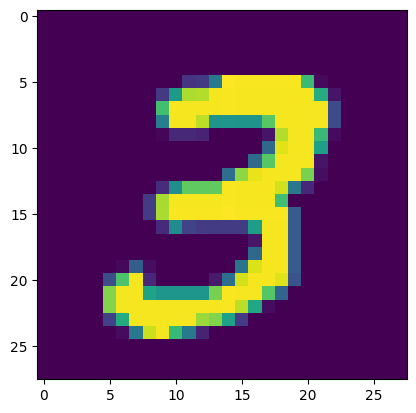

In [ ]:
plt.imshow(X_train[7])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 10)                170       
                                                                 
Total params: 105306 (411.35 KB)
Trainable params: 105306 (411.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics='accuracy')

In [ ]:
history = model.fit(X_train, y_train, epochs=13, validation_split=0.2)

Epoch 1/13
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3050 - accuracy: 0.9081 - val_loss: 0.1477 - val_accuracy: 0.9580
Epoch 2/13
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1217 - accuracy: 0.9636 - val_loss: 0.1084 - val_accuracy: 0.9678
Epoch 3/13
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0848 - accuracy: 0.9742 - val_loss: 0.1061 - val_accuracy: 0.9682
Epoch 4/13
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0668 - accuracy: 0.9786 - val_loss: 0.1036 - val_accuracy: 0.9684
Epoch 5/13
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0501 - accuracy: 0.9843 - val_loss: 0.1096 - val_accuracy: 0.9702
Epoch 6/13
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0407 - accuracy: 0.9870 - val_loss: 0.0982 - val_accuracy: 0.9726
Epoch 7/13
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0356 - accuracy: 0.9880 - val_loss: 0.1007 - val_accuracy:

In [ ]:
y_prob = model.predict(X_test)
y_prob

313/313 [==============================] - 1s 2ms/step


array([[1.9892324e-10, 1.6979893e-06, 5.1807683e-07, ..., 9.9980384e-01,
        7.1177635e-07, 8.0668951e-06],
       [9.7620084e-18, 3.7908123e-08, 1.0000000e+00, ..., 3.0490025e-08,
        3.8174329e-12, 4.5289041e-13],
       [1.6370603e-13, 9.9999642e-01, 1.2642535e-08, ..., 3.4057782e-06,
        6.7802297e-08, 3.6094641e-09],
       ...,
       [2.5534296e-18, 1.3915258e-18, 1.5392429e-13, ..., 4.7783240e-13,
        1.4188843e-11, 1.0896091e-08],
       [1.9390652e-20, 4.0761977e-19, 1.1470600e-17, ..., 1.3039616e-16,
        1.8737447e-08, 3.6505453e-14],
       [1.7977433e-12, 1.9403760e-19, 7.5641093e-15, ..., 8.9261937e-18,
        4.3523877e-14, 6.5736943e-22]], dtype=float32)

In [ ]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9731

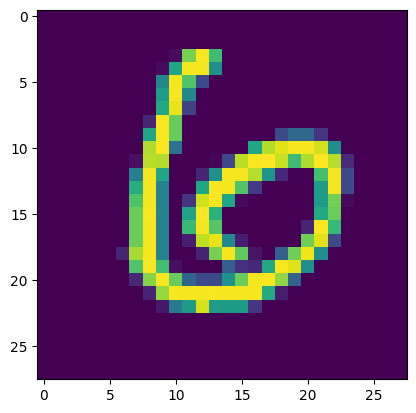

In [ ]:
plt.imshow(X_test[11])

In [ ]:
model.predict(X_test[11].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 42ms/step


array([6])

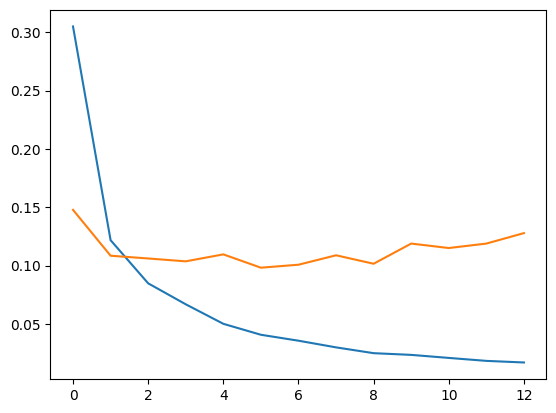

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

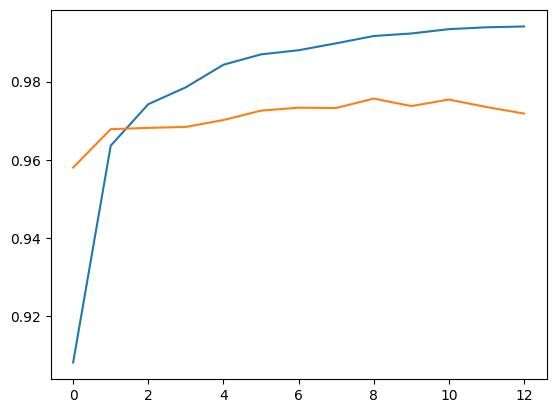

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])